# Hypothesis Testing with Insurance Data
Paul Montecinos
5/11/23


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load user data
df = pd.read_csv(r"C:\Users\paulm\Documents\Saved Data for DataFrames - Coding dojo\insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## - Q1. Do smokers have higher insurance charges than non-smokers?

### 1. State the Hypothesis & Null Hypothesis

* Null Hypothesis: There is not difference between charges for smokers and non-smokers
    
* Hypothesis: There is a significant difference between charges for smokers and non-smokers

### 2. Determine the correct test to perform.

* Numerical Data
* 2 groups
* 2 sample T-Test

In [4]:
## check the col that contains the measurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [5]:
## check the col that contains info on smokers
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [6]:
## create a column that easily separates our groups
df['is_smoker'] = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [7]:
## save list of columns needed for each group
needed_cols = ['is_smoker','charges']

df[needed_cols]

,is_smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [8]:
## save non-smokers in separate variable
nonsmoker_df = df.loc[ df['is_smoker']==False, needed_cols]
nonsmoker_df

,is_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [9]:
## save smokers in separate variables
smoker_df = df.loc[ df['is_smoker']==True, needed_cols]
smoker_df

,is_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [10]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([nonsmoker_df,smoker_df])
plot_df

,is_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


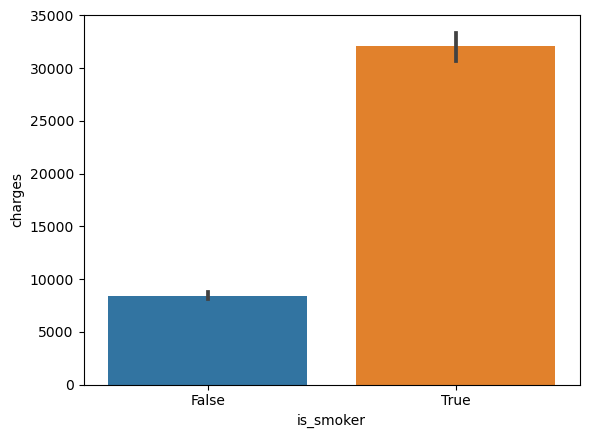

In [11]:
## visualize the group means
sns.barplot(data=plot_df, x='is_smoker',y='charges');

### 3. Testing Assumptions
* No significant outliers
* Normality
* Equal variance

In [12]:
## Saving JUST the numeric col as final group variables
smoker_group = smoker_df['charges']
nonsmoker_group = nonsmoker_df['charges']
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

### - Checking groups for outliers and removing if found

In [13]:
## Check nonsmoker group for outliers
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3
nonsmoker_outliers.sum()

24

In [14]:
## remove outliers from nonsmoker group
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [15]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

   ### - Assumptions of Normality

In [16]:
## Check nonsmoker group for normality
result = stats.normaltest(nonsmoker_group)
result.pvalue < .05

True

In [17]:
result.pvalue

2.6945416315543976e-36

In [18]:
## Check smoker group for normality
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

In [19]:
result.pvalue < .05

True

In [20]:
## Check n for nonsmoker group
len(nonsmoker_group), len(smoker_group)

(1040, 274)

- With the p-values less than .05 for the normality test we can reject the null hypothesis. Knowing we have large enough groups allows us to disregard the assumption of normality


### - Assumptions of Equal Variance

In [21]:
## Use Levene's test for equal variance
result = stats.levene(smoker_group, nonsmoker_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [22]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We did not meet the assumption for normality nor the equal variance.

- Since we did not meet either assumption, we will run a welch's t-test instead by adding equal_var = False to stats.ttest_ind



In [23]:
result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

In [24]:
smoker_group.mean()

32050.23183153284

In [25]:
nonsmoker_group.mean()

7939.8608446721155

- Final Conclusion:
    * We had a p-value < 0.05 for our welch's t-test. We reject the null hypothesis and support the alternative that there is a significant difference between charges for smokers and non-smokers

## - Q2. Are men more likely to smoke than women?

### 1. State the Hypothesis & Null Hypothesis

* Null Hypothesis: There is no difference between men being more likely to smoke than women
    
* Hypothesis: There is a significant difference between men being more likely to smoke than women

### 2. Determine the correct test to perform.

* Categorical Data
* 2 groups
* Chi-Square test

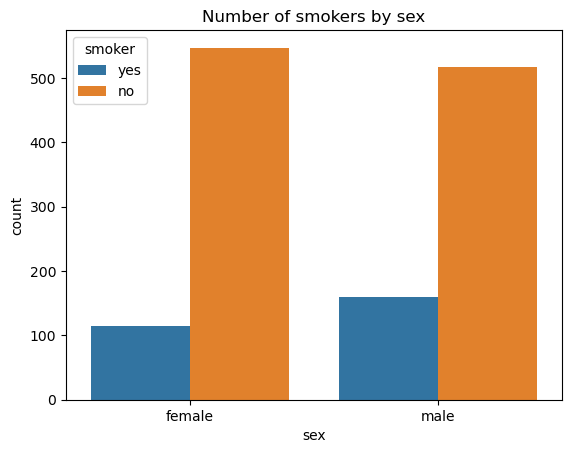

In [26]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokers by sex");

### 3. Testing Assumptions
* There are two categorical variables
* The outcomes are independent

In [27]:
# Contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [28]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [29]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- Final conclusion:
    * Since our p.value is less than 0.05, we reject the null hypothesis that there is not relationship between sex and smokers and support the alternative hypothesis that there is a relationship between males and females overall likely hood to smoke

## - Q3. Do different regions have different charges, on average?

### 1. State the Hypothesis & Null Hypothesis

* Null Hypothesis: There is no difference between charges based on regions
    
* Hypothesis: There is a significant difference between charges based on regions

### 2. Determine the correct test to perform.

* Numerical Data
* More than 2 
* Anova

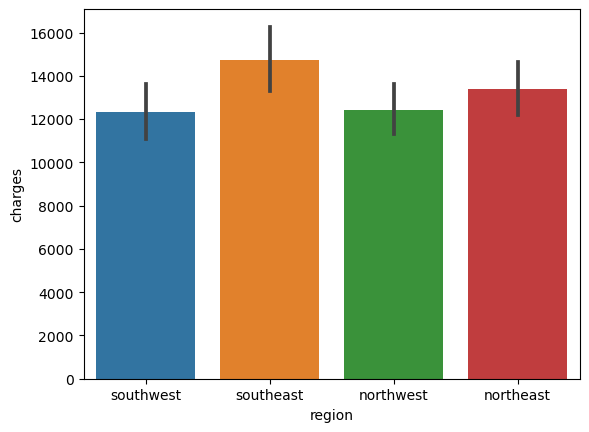

In [30]:
sns.barplot(data=df, x='region',y='charges');

### 3. Testing Assumptions
* No significant outliers
* Equal variance
* Normality

In [31]:
region_names = df['region'].unique()
region_names

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [32]:
## Create groups dictionary
groups = {}
## Loop through all unique categories
for i in region_names:
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [33]:
groups['southwest']

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 325, dtype: float64

### - Removing Outliers

In [34]:
groups_cln= {}

for region_name, grp_data in groups.items():
    region_outliers = np.abs(stats.zscore(grp_data)) > 3
    
    print(f'There were {region_outliers.sum()} outliers in {region_name}')
    
    grp_data_cln = grp_data[region_outliers==False]
    
    groups_cln[region_name] = grp_data_cln
    

There were 8 outliers in southwest
There were 2 outliers in southeast
There were 7 outliers in northwest
There were 4 outliers in northeast


### - Assumption of Normality

In [35]:
#### Running normal test on groups to confirm there are more than 20 for each
norm_results = {}
for i, data in groups_cln.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [36]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


- With the p-value being lower than .05 we can reject the null hypothesis
- Groups are larger than the cutoff so we can technically bypass this assumption for now

###  - Assumption of Equal Variance 

In [37]:
stats.levene(*groups_cln.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

- Since both assumtions failed instead of running the Anova test, we will run the Kruskal-Wallis test

### - Kruskal-Wallis test

In [38]:
stats.kruskal(*groups_cln.values())

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

Since our p.value is greater that .05 we fail to reject the null hypothesis. There is not significant difference between groups.